<a href="https://colab.research.google.com/github/tutuponnekanty/SentimentAnalysis/blob/main/Movie_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**My aim is to analyze movie reviews and assign scores based on their positive and negative aspects using Python. To make it even clear, we're performing *SENTIMENT ANALYSIS* on movie reviews.**

*Step 1 : Connecting google drive and accessing permissions.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


*Step 2 : Importing required libraries for the initial data rerading.*

Pandas and Numpy are always a goto because they work exceptionally well with datasets



In [ ]:
import pandas as pd
import numpy as np
import chardet
import seaborn

*Step 3 : Reading and Integrating the dataset from the drive.*

Here I'm using IMDB Dataset of 50K Movie reviews, which is around 66MB, and I downloaded it from kaggle.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ps
from matplotlib import style
style.use('ggplot')


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
df=data

*Data and it's attributes*

In [ ]:
data.shape

(1000, 2)

In [ ]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
data.info

<bound method DataFrame.info of                                                 review  sentiment
0    One of the other reviewers has mentioned that ...          1
1    A wonderful little production. <br /><br />The...          1
2    I thought this was a wonderful way to spend ti...          1
3    Basically there's a family where a little boy ...          0
4    Petter Mattei's "Love in the Time of Money" is...          1
..                                                 ...        ...
995  Nothing is sacred. Just ask Ernie Fosselius. T...          1
996  I hated it. I hate self-aware pretentious inan...          0
997  I usually try to be professional and construct...          0
998  If you like me is going to see this in a film ...          0
999  This is like a zoology textbook, given that it...          0

[1000 rows x 2 columns]>

Text(0.5, 1.0, 'Sentiment analysis')

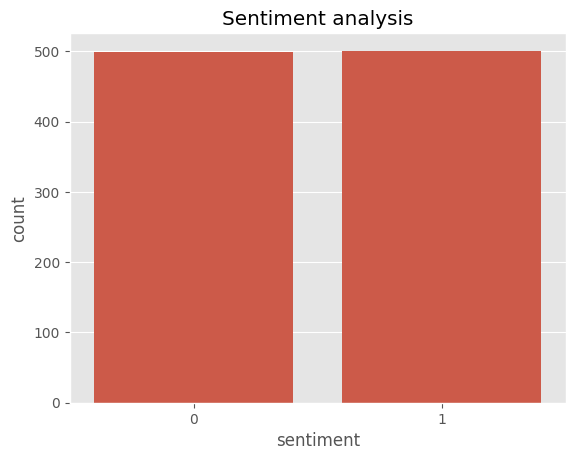

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment analysis")

***SENTIMENT ANALYSIS*** start

*Step 4 : Importing required libraries to perform sentiment analysis.*


In [ ]:
import nltk #natural-language-toolkit used to perform sentiment analysis based on words and sentences
import re #regular-expression for pattern matching and string manipulation
nltk.download('stopwords')
#Stopwords are common words (e.g., "and," "the," "is") that are often removed from text data during text processing because they usually don't contribute much to the meaning of the text.
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#PorterStemmer reduces words to their root or base form performing STEMMING



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]
for i in range(0,1000):
     rev = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data['review'][i])
     rev_words = rev.split()
     rev_words = [word for word in rev_words if not word in set(stopwords.words('english'))]
     ps= PorterStemmer()
     rev =[ps.stem(word) for word in rev_words]
     rev = ' '.join(rev)
     corpus.append(rev)



In [ ]:
corpus[:1200]

['one review mention watch oz episod hook they right exactli happen br br the first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid thi show pull punch regard drug sex violenc it hardcor classic use word br br it call oz nicknam given oswald maximum secur state penitentari it focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br i would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around the first episod i ever saw struck nasti surreal i say i readi i watch i develop tast oz got accustom high level graphic violenc not violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may bec

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X =cv.fit_transform(corpus).toarray()
y = data.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20, random_state=0)

In [ ]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier =MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)

y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 =accuracy_score(y_test,y_pred)
score2 = accuracy_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("---------SCORES--------")
print("Accuracy score is {}%".format(round(score1*100,3)))
print("Precision score is {}%".format(round(score2*100,3)))
print("recall score is {}%".format(round(score3*100,3)))

---------SCORES--------
Accuracy score is 78.0%
Precision score is 78.0%
recall score is 77.647%


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[90, 25],
       [19, 66]])

Text(95.72222222222221, 0.5, 'Actual Values')

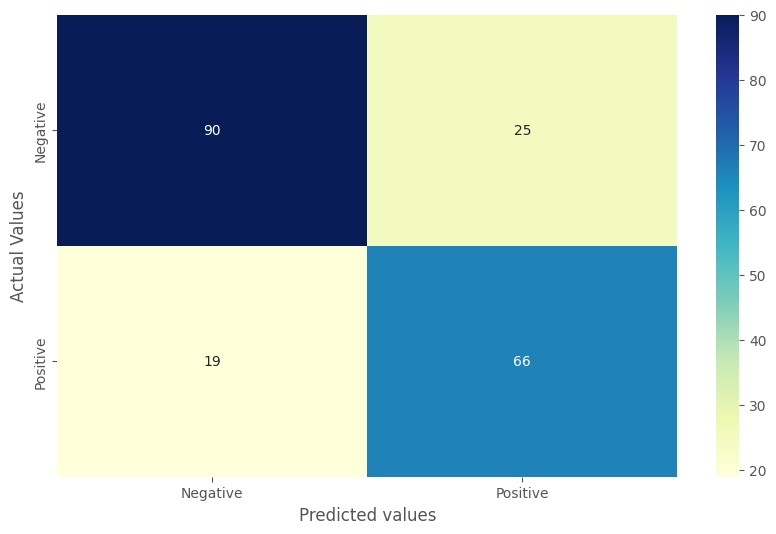

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize =(10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')

In [ ]:
from ssl import ALERT_DESCRIPTION_HANDSHAKE_FAILURE
best_accuracy =0.0
alpha_val =0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier =MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred =temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy Score for alpha={} is {}%".format(round(i,1),round(score*100,3)))
  if score>best_accuracy:
     best_accuracy=score
     alpha_val =i
print('----------------------------------------------------')
print("The Best Accuracy Score is {}% with alpha value as {}".format(round(best_accuracy*100, 2), round(alpha_val, 1)))

Accuracy Score for alpha=0.1 is 79.0%
Accuracy Score for alpha=0.2 is 78.5%
Accuracy Score for alpha=0.3 is 79.0%
Accuracy Score for alpha=0.4 is 79.0%
Accuracy Score for alpha=0.5 is 79.0%
Accuracy Score for alpha=0.6 is 79.0%
Accuracy Score for alpha=0.7 is 78.5%
Accuracy Score for alpha=0.8 is 78.5%
Accuracy Score for alpha=0.9 is 78.5%
Accuracy Score for alpha=1.0 is 78.0%
----------------------------------------------------
The Best Accuracy Score is 79.0% with alpha value as 0.1


In [ ]:
classifier =MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    temp = cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [ ]:
sample_review ='The movie is really bad.'

if predict_sentiment(sample_review):
  print("Positive review")

else:
  print("Negative review")

Negative review


In [ ]:
sample_review ='Movie was pretty bad and the direction was very slow'

if predict_sentiment(sample_review):
  print(" Positive review")

else:
  print(" Negative review")

 Negative review


In [ ]:
sample_review ='Movie was excellent and phenomenal'

if predict_sentiment(sample_review):
  print(" Positive review")

else:
  print(" Negative review")

 Positive review


In [ ]:
sample_review ='Dune is such a boring film, a sleep pill'

if predict_sentiment(sample_review):
  print(" Positive review")

else:
  print(" Negative review")

 Negative review


In [ ]:
sample_review ='Dune is a phenomenal movie and I really loved it. It is a masterpiece'

if predict_sentiment(sample_review):
  print(" Positive review")

else:
  print(" Negative review")

 Positive review


In [ ]:
sample_review ='Such a shitass movie, I have never seen trash like this in my entire life. It is a sleeping pill'

if predict_sentiment(sample_review):
  print(" Positive review")

else:
  print(" Negative review")

 Negative review
